<a href="https://colab.research.google.com/github/AkshayTandulkar/CS_584_Machine_Learning/blob/main/Video_processing_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imutils
!pip install dlib
!pip install face-recognition
!pip install pip install opencv-python
from google.colab import drive

## Converting Training Image set into 128d vector embeddings

In [3]:
# USAGE
# python encode_faces.py --dataset dataset --encodings encodings.pickle

# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--dataset", default="/content/drive/My Drive/dataset",
	#help="path to input directory of faces + images")
#ap.add_argument("-e", "--encodings", default="encodings.pickle",
	#help="path to serialized db of facial encodings")
#ap.add_argument("-d", "--detection-method", type=str, default="cnn",
	#help="face detection model to use: either `hog` or `cnn`")
#args = vars(ap.parse_args())

# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images("/content/drive/My Drive/dataset"))

# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]

	# load the input image and convert it from BGR (OpenCV ordering)
	# to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
	boxes = face_recognition.face_locations(rgb,
		model="cnn")

	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)

	# loop over the encodings
	for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
		knownEncodings.append(encoding)
		knownNames.append(name)

# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open("encodings.pickle", "wb")
f.write(pickle.dumps(data))
f.close()
print("[INFO] COMPLETED!")

[INFO] quantifying faces...
[INFO] processing image 1/13
[INFO] processing image 2/13
[INFO] processing image 3/13
[INFO] processing image 4/13
[INFO] processing image 5/13
[INFO] processing image 6/13
[INFO] processing image 7/13
[INFO] processing image 8/13
[INFO] processing image 9/13
[INFO] processing image 10/13
[INFO] processing image 11/13
[INFO] processing image 12/13
[INFO] processing image 13/13
[INFO] serializing encodings...
[INFO] COMPLETED!


## Detecting Face Entities from videos

In [4]:
# USAGE
# Invoke the function as shown below after the comment #Invoking the function and getting names and file_name 


# import the necessary packages
import face_recognition
import argparse
import imutils
import pickle
import time
import cv2
import os
from termcolor import colored
from google.colab import drive
drive.mount('/content/drive')

def face_from_video(input_file):
    #Getting file name along with its extension
		base = os.path.basename(input_file)
		#Getting file name without extension
		file_name = os.path.splitext(base)[0]
		#Getting the file extension
		#file_ext = os.path.splitext(base)[1]

		# load the known faces and embeddings
		print(colored("[INFO] loading encodings...","yellow"))
		data = pickle.loads(open("/content/drive/My Drive/videos/encodings.pickle", "rb").read())

		# initialize the pointer to the video file and the video writer
		print(colored("[INFO] processing video...","yellow"))
		stream = cv2.VideoCapture(input_file)

		#Name of faces recognized in the video
		names = []
		#making set of name to store unique names
		names_set = set()

		#unique list to store unique names from set
		unique_names_list = []
		while True:
    		# grab the next frame
			(grabbed, frame) = stream.read()

			# if the frame was not grabbed, then we have reached the
			# end of the stream
			if not grabbed:
				break

			# convert the input frame from BGR to RGB then resize it to have
			# a width of 750px (to speedup processing)
			rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
			rgb = imutils.resize(frame, width=750)

			# detect the (x, y)-coordinates of the bounding boxes
			# corresponding to each face in the input frame, then compute
			# the facial embeddings for each face
			boxes = face_recognition.face_locations(rgb,
				model="hog") 
			#choose model = "cnn" for better output but computationally heavy
			encodings = face_recognition.face_encodings(rgb, boxes)

			# loop over the facial embeddings
			for encoding in encodings:
				# attempt to match each face in the input image to our known
				# encodings
				matches = face_recognition.compare_faces(data["encodings"],
					encoding)
				name = "Unknown"

				# check to see if we have found a match
				if True in matches:
					# find the indexes of all matched faces then initialize a
					# dictionary to count the total number of times each face
					# was matched
					matchedIdxs = [i for (i, b) in enumerate(matches) if b]
					counts = {}

					# loop over the matched indexes and maintain a count for
					# each recognized face
					for i in matchedIdxs:
						name = data["names"][i]
						counts[name] = counts.get(name, 0) + 1

				# update the list of names
				names.append(name)
		names_set = set(names)
		unique_names_list = list(names_set)	
		print(colored("[INFO] processing video Completed","green"))
		return unique_names_list,file_name


#Invoking the function and getting names and file_name 
recognized_faces = face_from_video("/content/drive/My Drive/videos/unk_chandra_rajesh_ip.mp4")

#save the recognized face names to a text file
#recognized_faces[0] -> recognized face names
#recognized_faces[1] -> file_name
print(colored("[INFO] saving names...","yellow"))
with open("/content/names.txt", "w") as output:
	output.write(str(recognized_faces[0]))
print(colored("[INFO] Saving names Completed","green"))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] loading encodings...
[INFO] processing video...
[INFO] processing video Completed
[INFO] saving names...
[INFO] Saving names Completed


### Comparing HOG vs CNN
Ref: https://towardsdatascience.com/cnn-based-face-detector-from-dlib-c3696195e01c

In [ ]:
import cv2
import dlib
import argparse
import time

In [ ]:
# load input image
#image = cv2.imread("/content/drive/My Drive/dataset/N_Chandra/N_Chandra_side.jpg")
image = cv2.imread("/content/drive/My Drive/Nonfrontal_images/Akshay.jpg")
if image is None:
    print("Could not read input image")
    exit()

# initialize hog + svm based face detector
hog_face_detector = dlib.get_frontal_face_detector()

# initialize cnn based face detector with the weights
cnn_face_detector = dlib.cnn_face_detection_model_v1("/content/drive/My Drive/HOG_vs_CNN/mmod_human_face_detector.dat")

# Applying HOG face detection
start = time.time()

# apply face detection (hog)
faces_hog = hog_face_detector(image, 1)

end = time.time()
print("Execution Time (in seconds) :")
print("HOG : ", format(end - start, '.2f'))

# loop over detected faces
for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

# Applying CNN face detection
start = time.time()

# apply face detection (cnn)
faces_cnn = cnn_face_detector(image, 1)

end = time.time()
print("CNN : ", format(end - start, '.2f'))

# loop over detected faces
for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

     # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)

Execution Time (in seconds) :
HOG :  5.04
CNN :  3.95


## Display results

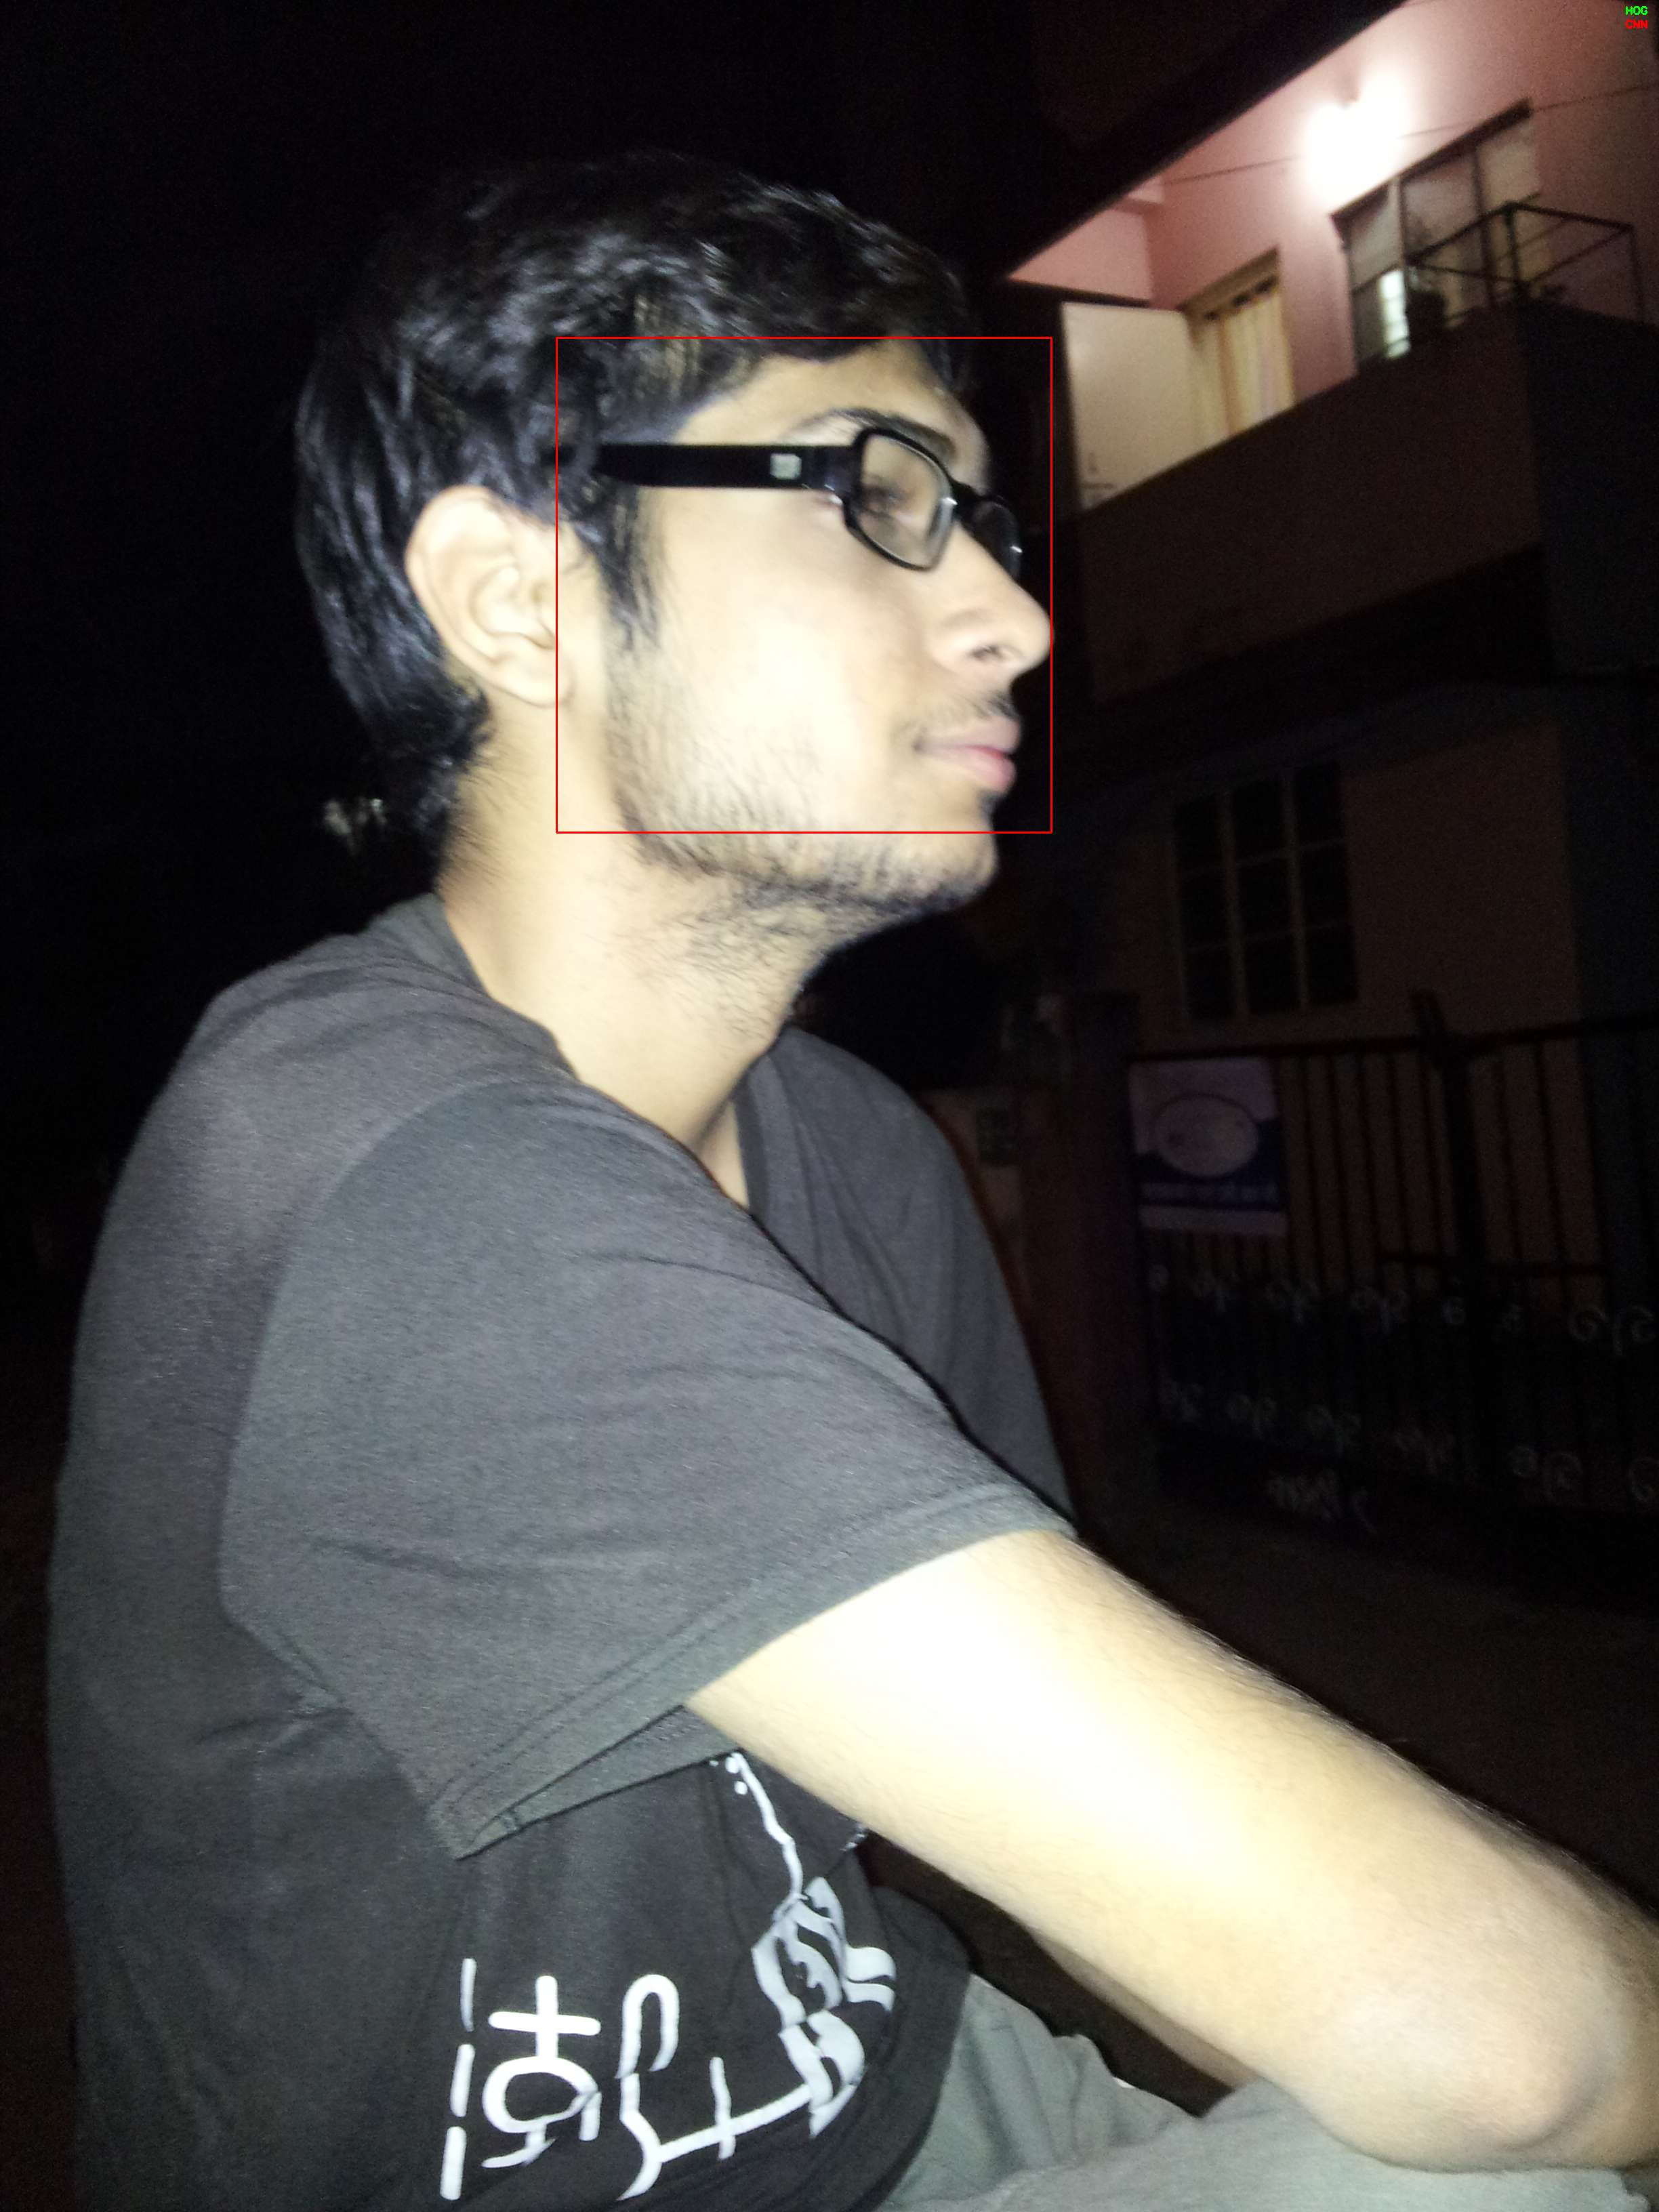

In [ ]:
from google.colab.patches import cv2_imshow
# write at the top left corner of the image
# for color identification
img_height, img_width = image.shape[:2]
cv2.putText(image, "HOG", (img_width-50,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                (0,255,0), 2)
cv2.putText(image, "CNN", (img_width-50,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                (0,0,255), 2)

# display output image
#cv2.imshow("face detection with dlib", image)
cv2_imshow(image)

cv2.waitKey()

# save output image 
cv2.imwrite("cnn_face_detection.png", image)

# close all windows
cv2.destroyAllWindows()

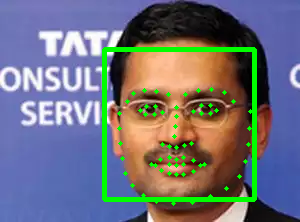

In [ ]:
# importing libraries
#Ref:  https://github.com/pythonboy178/python-projects/tree/master/Facial_landmark_detection
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import dlib
# function to convert dlib.full_object_detection to numpy array
def shape_to_np(shape, dtype="int"):
 coords = np.zeros((68, 2), dtype=dtype)
 for i in range(0, 68):
  coords[i] = (shape.part(i).x, shape.part(i).y)
 return coords
# reading an image and converting it to grayscale
#"/content/drive/My Drive/dataset/N_Chandra/N_Chandra_side.jpg"
image = cv2.imread("/content/drive/My Drive/dataset/Rajesh_Gopinathan/Rajesh_1.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# loading the classifiers with respected files
face_cascade = cv2.CascadeClassifier("/content/drive/My Drive/HAAR_vs_CNN/haarcascade_frontalface_default.xml")
predictor = dlib.shape_predictor("/content/drive/My Drive/HAAR_vs_CNN/shape_predictor_68_face_landmarks.dat")
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.10,minNeighbors=5)
# looping through each detected faces and drawing rectangle around the face and circles around the feature points
if len(faces)>0:
    for x,y,w,h in faces:
        cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0),3)
        # creating the rectangle object from the outputs of haar cascade calssifier
        drect = dlib.rectangle(int(x),int(y),int(x+w),int(y+h))
        landmarks = predictor(gray, drect)
        points = shape_to_np(landmarks)
        for i in points:
            x = i[0]
            y = i[1]
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
cv2_imshow(image)

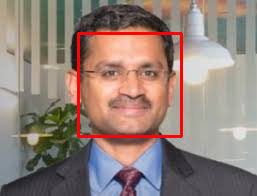

In [ ]:
import cv2
classifier = cv2.CascadeClassifier("/content/drive/My Drive/HAAR_vs_CNN/haarcascade_frontalface_default.xml")
img = cv2.imread("/content/drive/My Drive/dataset/Rajesh_Gopinathan/Rajesh_4.jpg")
faces = classifier.detectMultiScale(img)# result
#to draw faces on image
for result in faces:
    x, y, w, h = result
    x1, y1 = x + w, y + h
    cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
  
cv2_imshow(img)